<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DummyClassifier" data-toc-modified-id="DummyClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>DummyClassifier</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Итоги</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестовая выборка</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DummyClassifier" data-toc-modified-id="DummyClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DummyClassifier</a></span></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Итоги</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></li></ul></div>

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pymystem3 import Mystem
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords as nltk_stopwords

from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, precision_recall_curve,\
roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier

Отображение не более двух знаков после запятой

In [2]:
pd.set_option('display.float_format','{:,.2f}'.format)

Игнорирование предупреждений

In [3]:
import warnings
warnings.simplefilter('ignore')

Загружаем данные

In [4]:
data = pd.read_csv('/datasets/toxic_comments.csv')
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [6]:
lemmatizer = WordNetLemmatizer()

Загружаем стоп-слова

In [7]:
stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words = stopwords)

Функция по очистке текста от всех символов (оставляет только буквы английского алфавита)

In [8]:
def transform(text):
    edited_text = re.sub(r'[^a-zA-Z]', ' ', text)
    edited_text_finish = ' '.join(edited_text.split())
#     lemma = lemmatizer.lemmatize(edited_text_finish)
#     lemm_text = "".join(lemma)
    return edited_text_finish

Применяем функцию к нашему тексту

In [9]:
data['edited_text'] = data['text'].apply(transform)

In [10]:
data['edited_text'].head(10)

0    Explanation Why the edits made under my userna...
1    D aww He matches this background colour I m se...
2    Hey man I m really not trying to edit war It s...
3    More I can t make any real suggestions on impr...
4    You sir are my hero Any chance you remember wh...
5    Congratulations from me as well use the tools ...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word nonsense was offensive to yo...
9    alignment on this subject and which are contra...
Name: edited_text, dtype: object

In [11]:
def lemm(text):
    word_list = nltk.word_tokenize(text)
    lemm_text = " ".join(([lemmatizer.lemmatize(w) for w in word_list]))
    return lemm_text

In [12]:
data['lemm_text'] = data['edited_text'].apply(lemm)

In [13]:
data['lemm_text'].head(10)

0    Explanation Why the edits made under my userna...
1    D aww He match this background colour I m seem...
2    Hey man I m really not trying to edit war It s...
3    More I can t make any real suggestion on impro...
4    You sir are my hero Any chance you remember wh...
5    Congratulations from me a well use the tool we...
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism to the Matt Shirvington article...
8    Sorry if the word nonsense wa offensive to you...
9    alignment on this subject and which are contra...
Name: lemm_text, dtype: object

### Вывод:
1. получили на вход таблицу с текстом и разметкой о токсичности комментариев
2. очистили текст от лишних символов

## Обучение

Деление данных на выборки

In [14]:
features = data['lemm_text']
target = data['toxic']

In [15]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.4, random_state = 12345
)

In [16]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345
)

Классы сильно разбаллансированы. Класса 0 больше в 9 раз. Что может негативно сказаться на обучении модели, модель будет просто предсказывать всегда класс 0, так она будет чаще попадать

In [17]:
target.value_counts(normalize=True)

0   0.90
1   0.10
Name: toxic, dtype: float64

Векторизируем данные с учетом стоп-слов

In [18]:
tf_idf_features_train = count_tf_idf.fit_transform(features_train.values)

In [19]:
tf_idf_features_valid = count_tf_idf.transform(features_valid.values)

In [20]:
tf_idf_features_test = count_tf_idf.transform(features_test.values)

In [21]:
print(tf_idf_features_train.shape)
print(target_train.shape)
print()
print(tf_idf_features_valid.shape)
print(target_test.shape)
print()
print(tf_idf_features_test.shape)
print(target_test.shape)

(95742, 121737)
(95742,)

(31914, 121737)
(31915,)

(31915, 121737)
(31915,)


Функция по увеличению выборки с классом 1, так как его значительно меньше, чем класса 0

In [22]:
def upsample(features, target, repeat):
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    features_upsampled = pd.concat([features_zero] + [features_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

### RandomForestClassifier

In [23]:
model_rf = RandomForestClassifier(n_estimators = 10, random_state=12345)

In [24]:
model_rf.fit(tf_idf_features_train, target_train)
predicted_valid = model_rf.predict(tf_idf_features_valid)
f1 = f1_score(target_valid, predicted_valid)

print('RandomForestClassifier: f1 = {:.2f}'.format(f1))

RandomForestClassifier: f1 = 0.66


Переберем гиперпараметры:
- кол-во деревьев 50, 100
- глубина 20, 50
- с балансировкой классов

In [25]:
model = RandomForestClassifier()
parametrs_RF = {
    'n_estimators': [50, 100],
    'max_depth' : [20, 50],
    'random_state': [12345],
    'class_weight' : ['balanced']
}
grid_forest = GridSearchCV(model, param_grid=parametrs_RF, cv=3, scoring='f1')

In [26]:
best_est = 0
best_depth = 0
best_score_forest = 0.0
best_model_forest = None

for est in parametrs_RF['n_estimators']:
    for depth in parametrs_RF['max_depth']:
        model_RF = RandomForestClassifier(
            random_state=12345,
            n_estimators = est,
            max_depth = depth,
            class_weight='balanced'
        )
        model_RF.fit(tf_idf_features_train, target_train)
        predicted_valid = model_RF.predict(tf_idf_features_valid)
        score = f1_score(target_valid, predicted_valid)

        if score > best_score_forest:
            best_score_forest = score
            best_est = est
            best_depth = depth
            best_model_forest = model_RF
                

print('RandomForestClassifier: f1 = {:.2f}'.format(best_score_forest))
print(f'кол-во деревьев: {best_est}')
print(f'глубина: {best_depth}')

RandomForestClassifier: f1 = 0.48
кол-во деревьев: 50
глубина: 50


### LGBMClassifier

In [27]:
model_lgbm = LGBMClassifier(class_weight='balanced', n_estimators = 10, metric='f1')

In [28]:
model_lgbm.fit(tf_idf_features_train, target_train)
predicted_valid = model_lgbm.predict(tf_idf_features_valid)
f1 = f1_score(target_valid, predicted_valid)

print('LGBMClassifier: f1 = {:.2f}'.format(f1))

LGBMClassifier: f1 = 0.64


Переберем гиперпараметры:
- кол-во деревьев 50, 100
- глубина 6, 12
- с балансировкой классов

In [29]:
model = LGBMClassifier()
parametrs_LGBM = {
    'n_estimators': [100],
    'max_depth' : [12],
    'random_state': [12345],
    'class_weight' : ['balanced'],
}
grid_LGBM = GridSearchCV(model, param_grid=parametrs_LGBM, cv=3, scoring='f1')

In [30]:
best_est = 0
best_depth = 0
best_score_LGBM = 0.0
best_model_LGBM = None

for est in parametrs_LGBM['n_estimators']:
    for depth in parametrs_LGBM['max_depth']:
        model_LGBM = LGBMClassifier(
            random_state=12345,
            n_estimators = est,
            max_depth = depth,
            class_weight='balanced'
        )
        model_LGBM.fit(tf_idf_features_train, target_train)
        predicted_valid = model_LGBM.predict(tf_idf_features_valid)
        score = f1_score(target_valid, predicted_valid)

        if score > best_score_LGBM:
            best_score_LGBM = score
            best_est = est
            best_depth = depth
            best_model_LGBM = model_LGBM
                

print('LGBMClassifier: f1 = {:.2f}'.format(best_score_LGBM))
print(f'кол-во деревьев: {best_est}')
print(f'глубина: {best_depth}')

LGBMClassifier: f1 = 0.72
кол-во деревьев: 100
глубина: 12


Наилучший результат метрики показали 100 деревьев с глубиной 12

### LogisticRegression

In [31]:
model_LR = LogisticRegression(solver = 'liblinear', class_weight='balanced', random_state=12345)

In [32]:
model_LR.fit(tf_idf_features_train, target_train)
predicted_valid = model_LR.predict(tf_idf_features_valid)
f1 = f1_score(target_valid, predicted_valid)

print('LogisticRegression: f1 = {:.2f}'.format(f1))

LogisticRegression: f1 = 0.74


In [33]:
model = LogisticRegression()
parametrs_LR = {
    'solver': ['liblinear'],
    'penalty' : ['l1', 'l2'],
    'C' : [5, 10, 15],
    'random_state': [12345],
    'class_weight' : ['balanced'],
}
grid_LR = GridSearchCV(model, param_grid=parametrs_LR, cv=3, scoring='f1')

In [34]:
grid_LR.fit(tf_idf_features_train, target_train)
print(grid_LR.best_params_)
print('{:.2f}'.format(grid_LR.best_score_))

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 12345, 'solver': 'liblinear'}
0.76


In [35]:
grid_LR.best_estimator_

LogisticRegression(C=10, class_weight='balanced', random_state=12345,
                   solver='liblinear')

### DummyClassifier

Константную модель построим на предсказании класса 0 всегда, так как она сильно чаще встречается

In [36]:
model_Dummy = DummyClassifier(strategy = 'most_frequent')

In [37]:
model_Dummy.fit(tf_idf_features_train, target_train)
predicted_valid = model_Dummy.predict(tf_idf_features_valid)
f1_Dummy = f1_score(target_valid, predicted_valid)

print('DummyClassifier: f1 = {:.2f}'.format(f1_Dummy))

DummyClassifier: f1 = 0.00


### Итоги

In [39]:
values_models = pd.DataFrame(
    [
    ['RandomForestClassifier', best_score_forest],
    ['LGBMClassifier', best_score_LGBM],
    ['LogisticRegression', grid_LR.best_score_],
    ['DummyClassifier', f1_Dummy],
],
    columns=['Model', 'f1_train']
)
values_models

,Model,f1_train
0,RandomForestClassifier,0.48
1,LGBMClassifier,0.72
2,LogisticRegression,0.76
3,DummyClassifier,0.00


In [40]:
sort = values_models.sort_values(by='f1_train', ascending=False)
sort

,Model,f1_train
2,LogisticRegression,0.76
1,LGBMClassifier,0.72
0,RandomForestClassifier,0.48
3,DummyClassifier,0.00


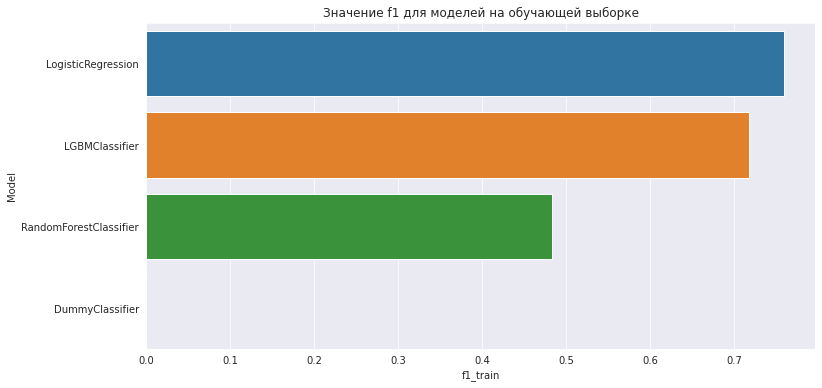

In [41]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

sns.barplot(y=sort['Model'], x=sort['f1_train'])

plt.title('Значение f1 для моделей на обучающей выборке')
plt.show()

### Вывод:
1. обучили три модели: RandomForestClassifier, LGBMClassifier, LogisticRegression
2. также константную модель DummyClassifier
3. наилучший результат показала LogisticRegression и DummyClassifier с фиксированным предсказанием класса 0
4. чуть хуже результат у LGBMClassifier и на последнем месте RandomForestClassifier

## Тестовая выборка

In [42]:
def test(model, features_train, target_train, features_test, target_test, model_name):
    model.fit(features_train, target_train)
    predicted_test = model.predict(features_test)
    f1 = f1_score(target_test, predicted_test)

    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    roc_auc = roc_auc_score(target_test, probabilities_one_test)

    print(model_name, ': f1 = {:.2f}'.format(f1))
    print(model_name, ': roc_auc = {:.2f}'.format(roc_auc))
    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr)
    # plt.step(fpr, tpr, where='post')
    plt.plot([0,1],[0,1], linestyle='--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('Доля ложноположительных предсказаний')
    plt.ylabel('Доля положительных ответов')
    plt.title('ROC-кривая ' + model_name)

    plt.show()
    
    matrix = confusion_matrix(target_test, predicted_test)
    print(matrix)
    print()
    recall = recall_score(target_test, predicted_test)
    precision = precision_score(target_test, predicted_test)
    print(model_name, ': recall = {:.2f}'.format(recall))
    print(model_name, ': precision = {:.2f}'.format(precision))
    
    precision_plot, recall_plot, thresholds = precision_recall_curve(target_test, probabilities_one_test)

    plt.figure(figsize=(6, 6))
    plt.plot(recall_plot, precision_plot)
    plt.xlabel('Полнота')
    plt.ylabel('Точность')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Точность - Полнота')
    plt.show() 
    
    return f1, recall, precision, roc_auc

In [43]:
total_features = pd.concat([features_train] + [features_valid])
total_target = pd.concat([target_train] + [target_valid])

In [44]:
total_features_tf_idf = count_tf_idf.transform(total_features.values)

### RandomForestClassifier

RandomForestClassifier : f1 = 0.45
RandomForestClassifier : roc_auc = 0.88


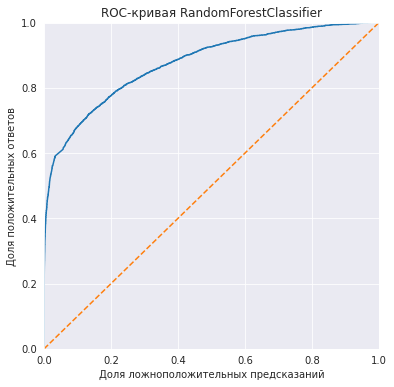

[[23431  5274]
 [  765  2445]]

RandomForestClassifier : recall = 0.76
RandomForestClassifier : precision = 0.32


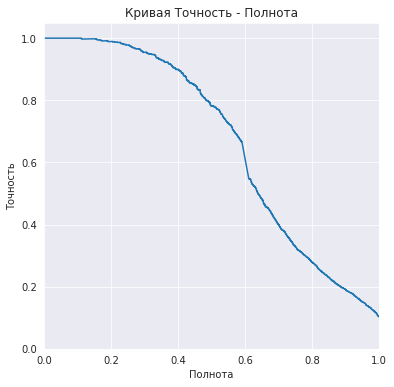

In [45]:
f1_test_RF, recall_test_RF, precision_test_RF, roc_auc_test_RF = test(
    best_model_forest,
    total_features_tf_idf, 
    total_target, 
    tf_idf_features_test, 
    target_test, 
    'RandomForestClassifier')

### LGBMClassifier

LGBMClassifier : f1 = 0.72
LGBMClassifier : roc_auc = 0.94


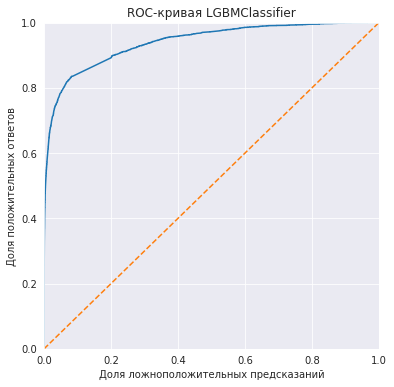

[[27576  1129]
 [  781  2429]]

LGBMClassifier : recall = 0.76
LGBMClassifier : precision = 0.68


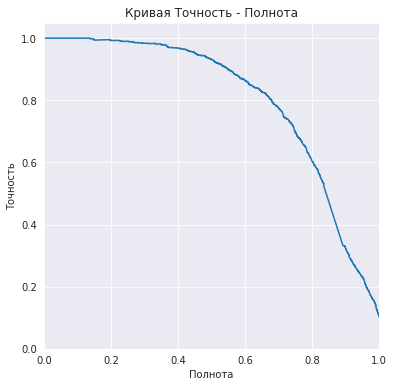

In [46]:
f1_test_LGBM, recall_test_LGBM, precision_test_LGBM, roc_auc_test_LGBM = test(
    best_model_LGBM,
    total_features_tf_idf, 
    total_target, 
    tf_idf_features_test, 
    target_test, 
    'LGBMClassifier')

### LogisticRegression

LogisticRegression : f1 = 0.76
LogisticRegression : roc_auc = 0.97


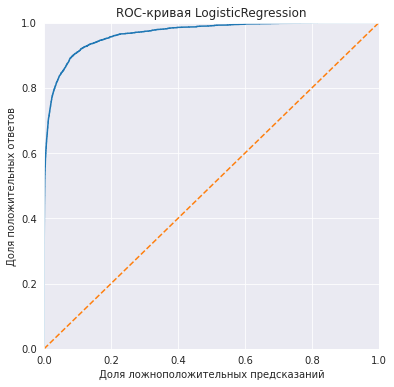

[[27605  1100]
 [  583  2627]]

LogisticRegression : recall = 0.82
LogisticRegression : precision = 0.70


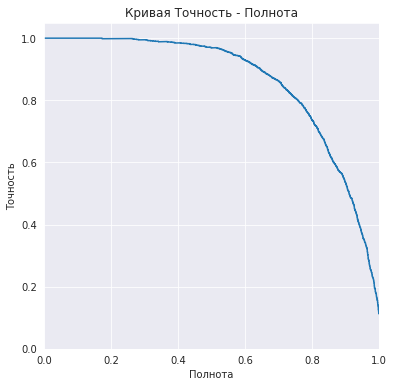

In [47]:
f1_test_LR, recall_test_LR, precision_test_LR, roc_auc_test_LR = test(
    grid_LR.best_estimator_,
    total_features_tf_idf, 
    total_target, 
    tf_idf_features_test, 
    target_test, 
    'LogisticRegression')

### DummyClassifier

DummyClassifier : f1 = 0.00
DummyClassifier : roc_auc = 0.50


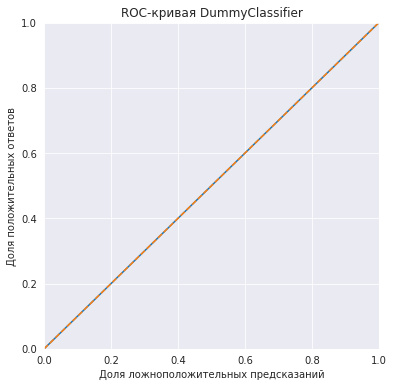

[[28705     0]
 [ 3210     0]]

DummyClassifier : recall = 0.00
DummyClassifier : precision = 0.00


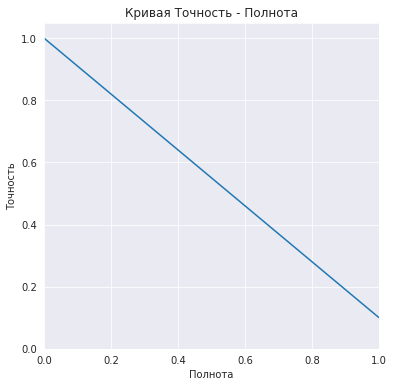

In [48]:
f1_test_Dummy, recall_test_Dummy, precision_test_Dummy, roc_auc_test_Dummy = test(
    model_Dummy,
    total_features_tf_idf, 
    total_target, 
    tf_idf_features_test, 
    target_test, 
    'DummyClassifier')

Полнота и точность равны нулю, так как отсутствуют значения True Positive, которые участвуют в обеих формулах. Значения отсутствуют, так как мы постоянно предсказываем класс "0"

### Итоги

In [49]:
values_models['f1_test'] = [f1_test_RF, f1_test_LGBM, f1_test_LR, f1_test_Dummy]
values_models['recall'] = [recall_test_RF, recall_test_LGBM, recall_test_LR, recall_test_Dummy]
values_models['precision'] = [precision_test_RF, precision_test_LGBM, precision_test_LR, precision_test_Dummy]
values_models['roc_auc'] = [roc_auc_test_RF, roc_auc_test_LGBM, roc_auc_test_LR, roc_auc_test_Dummy]


In [50]:
values_models

,Model,f1_train,f1_test,recall,precision,roc_auc
0,RandomForestClassifier,0.48,0.45,0.76,0.32,0.88
1,LGBMClassifier,0.72,0.72,0.76,0.68,0.94
2,LogisticRegression,0.76,0.76,0.82,0.70,0.97
3,DummyClassifier,0.00,0.00,0.00,0.00,0.50


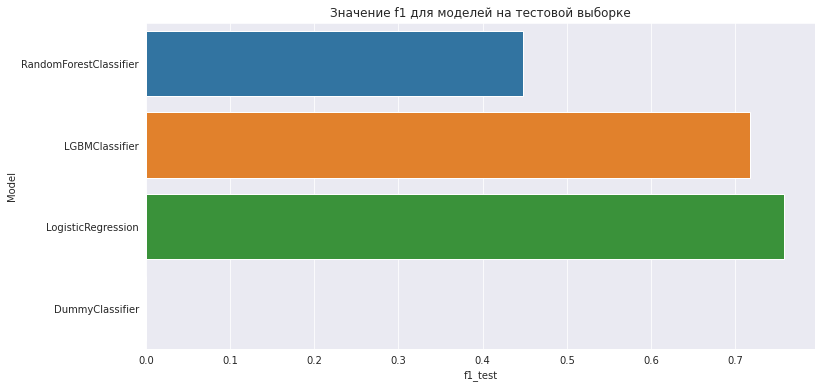

In [51]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')

sns.barplot(y=values_models['Model'], x=values_models['f1_test'])

plt.title('Значение f1 для моделей на тестовой выборке')
plt.show()

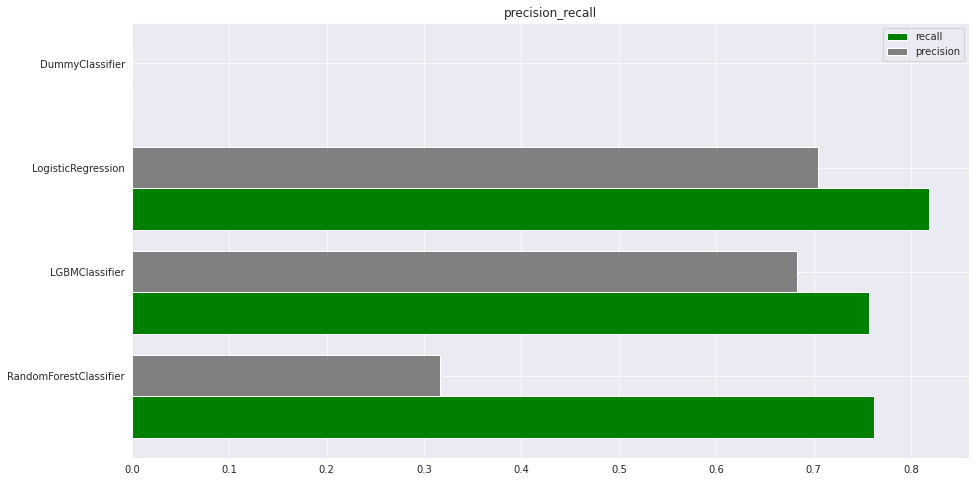

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
# plt.subplots(1,2,1)
ind = np.arange(len(values_models))
width = 0.4

ax.barh(ind, values_models['recall'],width, color='green', label='recall')
ax.barh(ind + width, values_models['precision'], width, color='grey', label='precision')
ax.set(yticks=ind + width, yticklabels=values_models['Model'])
ax.legend()
plt.title('precision_recall')

plt.show()

### Общий вывод:
1. получили на вход таблицу с текстом и разметкой о токсичности комментариев для построения модели с целью предсказания положительных (класс 0) и отрицательных комментариев (класс 1)
2. в предобработке очистили данных от лишних символов, оставив только буквы английского алфавита и привели слова к их словарной форме (лемматизировали)
3. выявили значительную разбалансировку классов (9:1 отрицательного к положительному классу)
4. обучили три модели: RandomForestClassifier, LGBMClassifier, LogisticRegression и константную модель с постоянным предсказанием класса 0, так как данный класс в 9 раз превышает класс 1
5. с метрикой __f1_score__ наилучшим образом показала себя модель LogisticRegression, чуть хуже значение у модели LGBMClassifier
6. на тестовой выборке результаты подтвердились, __f1_score__ почти не отличается от результатов на обучающей, что говорит о том, что модели не были переобучены
7. наиболее предпочтительной выглядит модель LogisticRegression с __f1_score = 0.76__ и наивысшим результатом полноты и точности